In [1]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
from scipy.stats import normaltest
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

print(os.getcwd())

C:\Users\wooo_\OneDrive\Desktop\SUTD Notes\Data Validation and Statistical Analysis\Group Project


In [2]:
# Read the file
df1 = pd.read_csv(r"C:\Users\wooo_\OneDrive\Desktop\SUTD Notes\Data Validation and Statistical Analysis\Group Project\IBM Data.csv", header=0)
print(df1.shape)

(1470, 35)


In [3]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# #changing attrition values to 1 and 0
# df1.groupby('Attrition').size()

# df1['Attrition']=df1['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

# df1.head()

In [6]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## The Normalisation Test of the Work Life Balance

In [7]:
z=np.abs(stats.zscore(df1['WorkLifeBalance']))
print(z)

[2.49382042 0.33809616 0.33809616 ... 0.33809616 1.07786213 1.75405446]


In [8]:
threshold=3
print(np.where(z>3))

df2=df1[(z>3)]
print(df2)

(array([], dtype=int64),)
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [9]:
stat, p = normaltest(df1['WorkLifeBalance'])       
## Agostino Normality Test

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=74.14, p=0.00
Not Approximately Normally Distributed


## The visualisation of the distribution of the Work Life balance 

Text(0, 0.5, 'Counts')

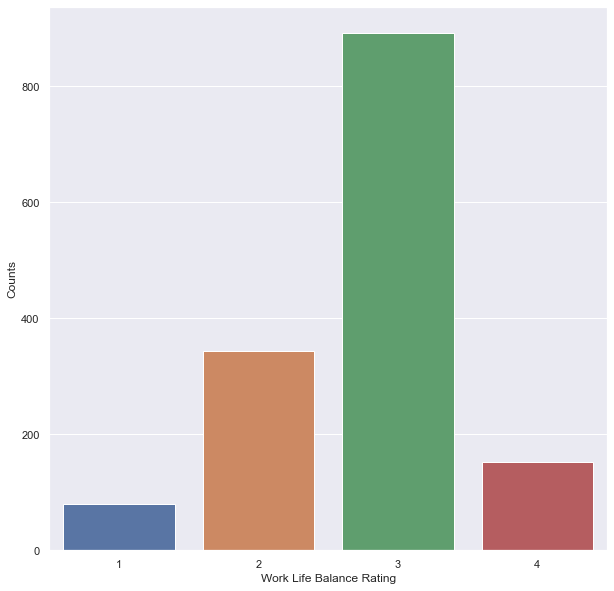

In [10]:

plt.rcParams['figure.figsize'] = 10, 10

sns.countplot(x='WorkLifeBalance', data=df1)

plt.xlabel("Work Life Balance Rating")
# plt.xticks(rotation=55)
plt.ylabel('Counts')


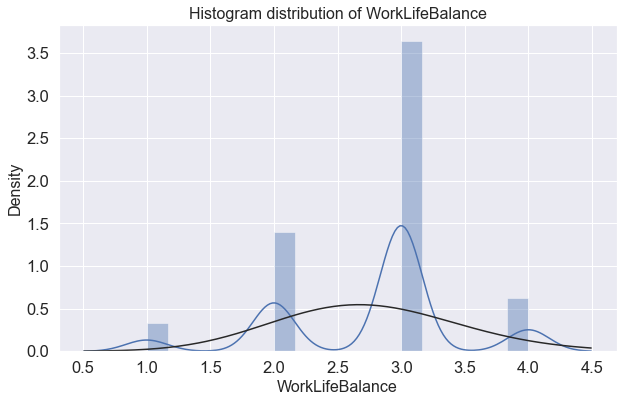

In [11]:
plt.rcParams["figure.figsize"] = [10,6]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

sns.distplot(df1['WorkLifeBalance'],fit=stats.invgamma,kde=True)
#super imposed the normal curve to the histogram of WorkLifeBalance, 
#KDE curve is set to false cuz default is True.

plt.title('Histogram distribution of WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.show()

## The Normality Check for Monthly Income 

In [12]:
z=np.abs(stats.zscore(df1['MonthlyIncome']))
print("The Z values:", z)

threshold=3
print(np.where(z>3))

df3=df1[(z>3)]
print(df3)

The Z values: [0.10834951 0.29171859 0.93765369 ... 0.07669019 0.23647414 0.44597809]
(array([], dtype=int64),)
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [13]:
stat, p = normaltest(df1['MonthlyIncome'])       
## Agostino Normality Test

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('The Monthly Income is: Not Approximately Normally Distributed')

stat=305.33, p=0.00
The Monthly Income is: Not Approximately Normally Distributed


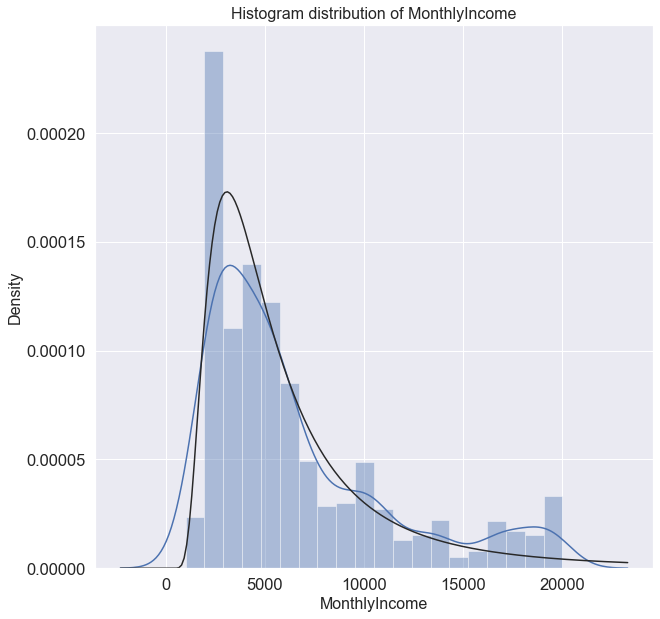

In [14]:
plt.rcParams["figure.figsize"] = [10, 10]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

sns.distplot(df1['MonthlyIncome'],fit=stats.invgamma,kde=True)
#super imposed the normal curve to the histogram of MonthlyIncome, 
#KDE curve is set to false cuz default is True.

plt.title('Histogram distribution of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.show()

In [15]:
stat, p = kruskal(df1['WorkLifeBalance'],df1['MonthlyIncome'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('They have the distributions (fail to reject H0)')
else:
    print('They have different distributions (reject H0)')

Statistics=2271.921, p=0.000
They have different distributions (reject H0)


((array([-3.30705164, -3.04998245, -2.90703241, ...,  2.90703241,
          3.04998245,  3.30705164]),
  array([ 1009,  1051,  1052, ..., 19943, 19973, 19999], dtype=int64)),
 (4292.877241269356, 6502.931292517008, 0.9103381747711132))

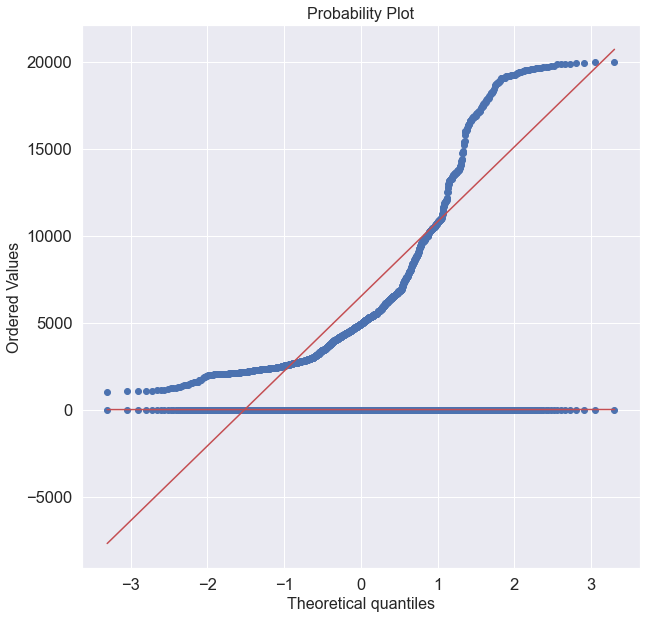

In [16]:
# imports 
import scipy.stats as sc
measurements = df1['WorkLifeBalance']
sc.probplot(measurements, dist="norm", plot=plt)

measurements2 = df1['MonthlyIncome']
sc.probplot(measurements2, dist="norm", plot=plt)

In [17]:
(sprho, p_value) = spearmanr(df1['WorkLifeBalance'],df1['MonthlyIncome'], nan_policy="omit")
#omit comes in when suppose missing values are present in data, you need to delete or remove otherwise
#it wouldn't calculate, since missing or na can't. If you didnt turn on the flag you will get an issue later

print("The correlation coefficient is: ", '{:.2f}'.format(sprho))
print("The p-value is:",'{:.5f}'.format(p_value))

if p_value < 0.05:
    print('The two variables are likely dependent')
else:
    print('The two variables are likely not dependent')
#since p-value is 0 < 0.05, we reject the null claim(𝐻0:𝜌=0)
#and conclude that (𝐻1:𝜌≠0), hence the correlation results in some relationship
#between floor_sqm and resale_price
#in this case the R is 0.69

The correlation coefficient is:  0.03
The p-value is: 0.23856
The two variables are likely not dependent
